In [1]:
import sys
AUX_PATH = '/home/nata/Projects/Active/src'
if AUX_PATH not in sys.path:
    sys.path.insert(0, AUX_PATH)
import utils
import preprocessing
import models
import tournament

import pandas as pd
import numpy as np
import xgboost as xgb
import warnings
import matplotlib.pyplot as plt
import datetime as dt

from joblib import Parallel, delayed
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import TimeSeriesSplit

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%%time
df1 = pd.read_excel('../data/raw/stock/st1.xlsx', dtype={'Product':'str'})
df2 = pd.read_excel('../data/raw/stock/st2.xlsx', dtype={'Product':'str'})


CPU times: user 1min 20s, sys: 347 ms, total: 1min 21s
Wall time: 1min 21s


In [5]:
df = pd.concat([df1, df2])
prod = pd.read_csv('../data/masterdata/Product_MD.csv',
                    sep=';',
                    encoding='windows-1251',
                    dtype={'SKU':'str', 'PRODUCT_CODE':'str'})
prod = prod[['PRODUCT_CODE', 'SKU']].drop_duplicates()
df = pd.merge(df, prod, how='left', right_on='SKU', left_on='Product')
df['Chain'] = 'MAGNIT'
df = df.groupby(['PRODUCT_CODE', 'Chain', 'Date'], as_index=False).sum()
df.head()

PRODUCT_CODE   Chain       Date  ship_to_stock   DC_stock
0         0002  MAGNIT 2019-07-01      14009.479  70078.381
1         0002  MAGNIT 2019-07-02      14005.299  69257.085
2         0002  MAGNIT 2019-07-03      14003.000  68683.640
3         0002  MAGNIT 2019-07-04      13983.354  68028.138
4         0002  MAGNIT 2019-07-05      13956.602  68741.723

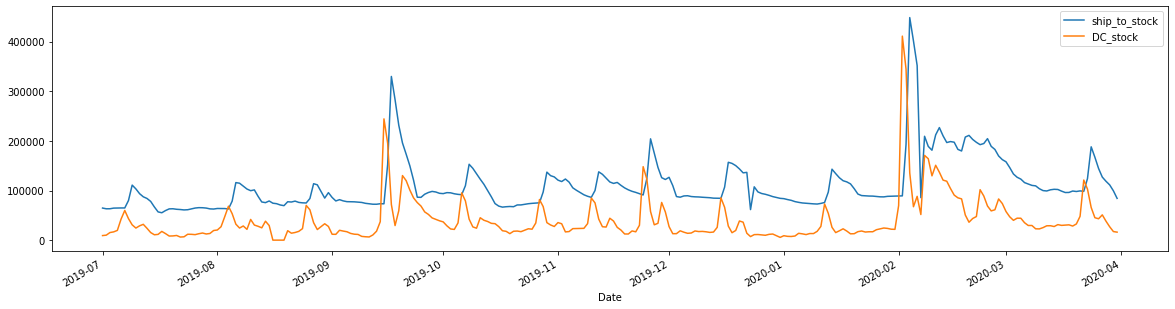

In [7]:
tmp = df[(df['Chain']=='MAGNIT')&(df['PRODUCT_CODE']=='0229')]
tmp['Date'] = pd.to_datetime(tmp['Date'], format='%d.%m.%Y')
tmp.plot(x='Date', figsize=(20, 5))